<style>
.wzor {
  /* width: auto; */
  /* padding: auto; */
  border: 0.5rem solid gray;
  /* margin: 0; */
  background-color: lightgray;
}
</style>


# Modele analizy danych

Tomasz Rodak

---

## Wykład VI

ISLP, rozdział 4.3

---

## Literatura
   1. James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor,
      J. (2023). An Introduction to Statistical Learning: With
      Applications in Python.
      
      [ISLP](https://www.statlearning.com/)
   
   2. Bishop, C. M., & Nasrabadi, N. M. (2006). Pattern recognition and
      machine learning (Vol. 4, No. 4, p. 738). New York: springer. 
   
      [PRML](https://www.microsoft.com/en-us/research/people/cmbishop/prml-book/)
   
   3. Kroese, D. P., Botev, Z., Taimre, T., & Vaisman, R. (2019). Data
      science and machine learning: mathematical and statistical
      methods. CRC Press.
   
      [https://people.smp.uq.edu.au/DirkKroese/DSML/](https://people.smp.uq.edu.au/DirkKroese/DSML/)
   
   4. Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman,
      J. H. (2009). The elements of statistical learning: data mining,
      inference, and prediction (Vol. 2, pp. 1-758). New York:
      springer.
   
      [https://hastie.su.domains/ElemStatLearn/](https://hastie.su.domains/ElemStatLearn/)
   
   5. Murphy, K. P. (2022). Probabilistic machine learning: an
      introduction. MIT press.
   
      [https://probml.github.io/pml-book/book1.html](https://probml.github.io/pml-book/book1.html)
   
   6. Murphy, K. P. (2023). Probabilistic machine learning: Advanced
      topics. MIT press.
   
      [https://probml.github.io/pml-book/book2.html](https://probml.github.io/pml-book/book2.html)
   
   7. Bishop, C. M., & Bishop, H (2024). Deep learning. Springer.
   
      [https://www.bishopbook.com/](https://www.bishopbook.com/)
   
   8. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
   
      [https://www.deeplearningbook.org/](https://www.deeplearningbook.org/)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import statsmodels.api as sm


## Regresja logistyczna

### Zbiór `Default`

Zbiór danych `Default` zawiera informacje o 10 tysiącach klientów banku wraz z informacją, czy klient zalegał z płatnościami. Zmiennymi objaśniającymi są:
- `balance` - saldo (kwota pozostała do spłaty),
- `income` - dochód,
- `student` - czy klient jest studentem.

Zmienną objaśnianą jest `default` - czy klient zalegał z płatnościami. Zbiór `Default` jest symulacją, w której zmienna `default` silnie zależy od zmiennych `balance` i `income`.

In [3]:
df = pd.read_csv('datasets/Default.csv', index_col=0)
df.reset_index(drop=False, inplace=True)
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


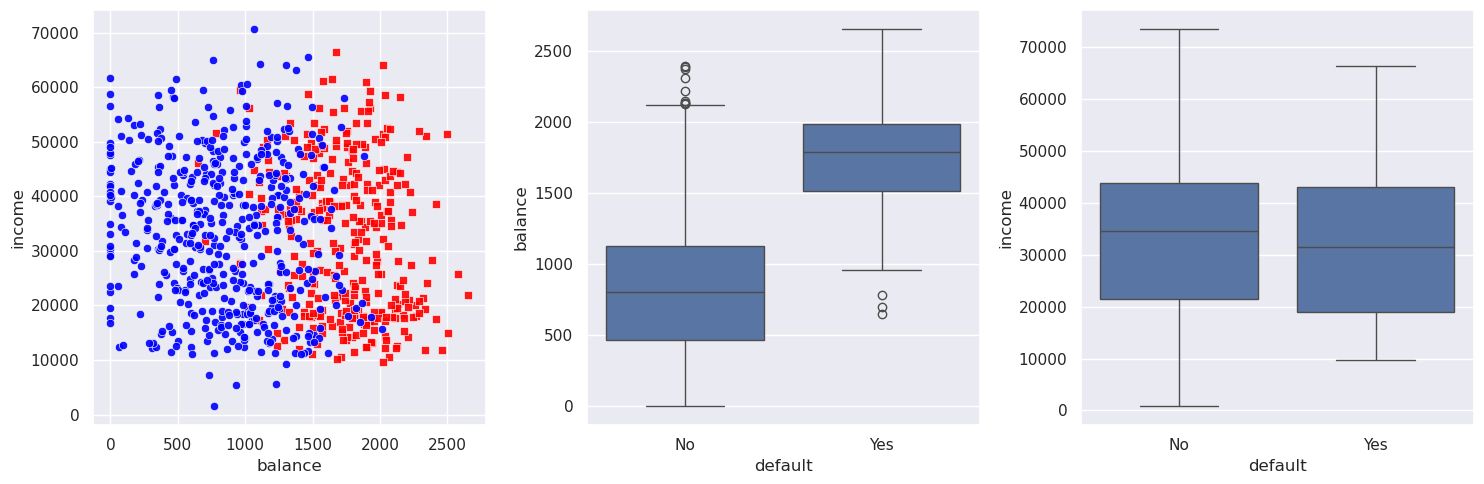

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.scatterplot(
    x='balance', y='income', data=df[df.default == 'Yes'], 
    marker='s', color='red', alpha=0.9, ax=ax1
    )
sns.scatterplot(
    x='balance', y='income', data=df[df.default == 'No'].sample(500), 
    marker='o', color='blue', alpha=0.9, ax=ax1
    )
sns.boxplot(x='default', y='balance', data=df, ax=ax2)
sns.boxplot(x='default', y='income', data=df, ax=ax3)
fig.tight_layout();

### Klasyfikacja za pomocą regresji liniowej?

1. Jeśli zmienna celu ma więcej niż dwie wartości, to kodowanie tej zmiennej za pomocą liczb całkowitych wymusza porządek na kategoriach. Jednak naturalny porządek w kategoriach nie musi istnieć, co prowadzi do problemów interpretacyjnych.
2. Regresja liniowa ma wartości w całym zbiorze liczb rzeczywistych, więc może przewidywać wartości spoza zakresu zmiennej celu. Często chcemy, aby funkcja wyznaczona przez model mogła być interpretowana jako prawdopodobieństwo, co ogranicza jej zakres wartości do przedziału $[0,1]$.

### Model regresji logistycznej

Niech zmienna celu $Y\in\{0,1\}$ będzie dwuklasową zmienną losową, a $X$ wektorem losowym zmiennych objaśniających. W modelu regresji logistycznej poszukujemy funkcji przypisującej wektorowi $x$ prawdopodobieństwo przynależności do klasy $Y=1$ pod warunkiem $X=x$:


<div class="wzor">

\begin{equation*}
x\mapsto P(Y=1|X=x).
\end{equation*}
</div>

Przykładowo, kodując zmienną `default` jako `No`$=0$, `Yes`$=1$ i wykorzystując `balance` jako zmienną objaśniającą, model regresji logistycznej szacuje prawdopodobieństwo zalegania z płatnościami pod warunkiem wystąpienia określonego salda `balance`:

\begin{equation*}
P(\verb+default+ = \verb+Yes+ | \verb+balance+).
\end{equation*}

Przyjmując $.5$ jako próg, przypiszemy obserwację do klasy `Yes`, jeśli szacowane prawdopodobieństwo jest większe niż $.5$; w przeciwnym przypadku przypiszemy obserwację do klasy `No`. Jest to postępowanie, które próbuje aproksymować klasyfikator Bayesa. 

Przykład dla zmiennej `default` względem `balance`:

In [5]:
X = df[['balance']]
y = df.default.map({'Yes': 1, 'No': 0})
logit = sm.Logit(y, sm.add_constant(X))
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


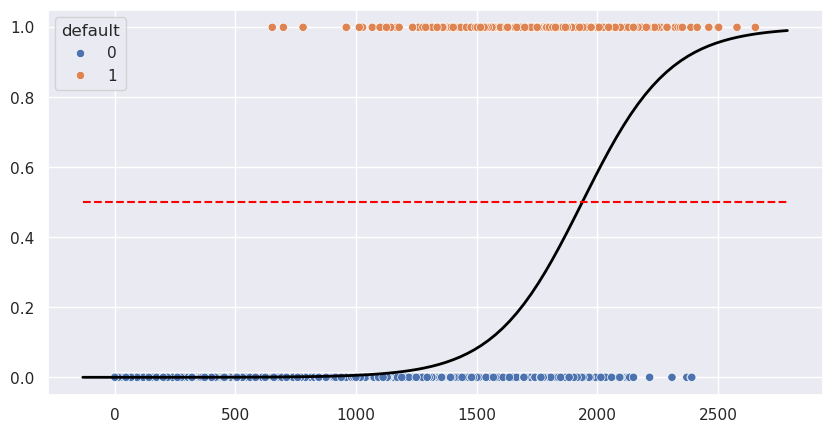

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=X.values.reshape(-1), y=y.values, hue=y, ax=ax)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
ax.plot(x, result.predict(sm.add_constant(x)), color='black', linewidth=2)
ax.hlines(0.5, xmin, xmax, color='red', linestyle='--');

### Regresja logistyczna jednowymiarowa

Model regresji logistycznej zdefiniujemy najpierw dla sytuacji z jedną zmienną objaśniającą, a następnie rozszerzymy go na przypadek wielu zmiennych objaśniających.

Załóżmy, że $X$ jest zmienną losową o wartościach w $\mathbb{R}$. Wówczas model regresji logistycznej ma postać:


<div class="wzor">

\begin{equation}
\begin{split}
P(Y=1|X=x) &= \frac{\exp(\beta_0+\beta_1x)}{1+\exp(\beta_0+\beta_1x)}\\
&= \frac{1}{1+\exp(-(\beta_0+\beta_1x))}\\
&= \sigma(\beta_0+\beta_1x),
\end{split}\tag{logit model}
\end{equation}
</div>

gdzie




<div class="wzor">

\begin{equation*}
\sigma(a) = \frac{1}{1+\exp(-a)},\quad a\in\mathbb{R},
\end{equation*}
</div>

oznacza funkcję logistyczną lub sigmoidalną. Parametry $\beta_0$ i $\beta_1$ są nieznane; szacujemy je, zwykle stosując metodę największej wiarygodności.

Funkcja $\sigma$ jest funkcją rosnącą, przyjmuje wartości z przedziału $(0,1)$ i jest symetryczna względem $a=0$:



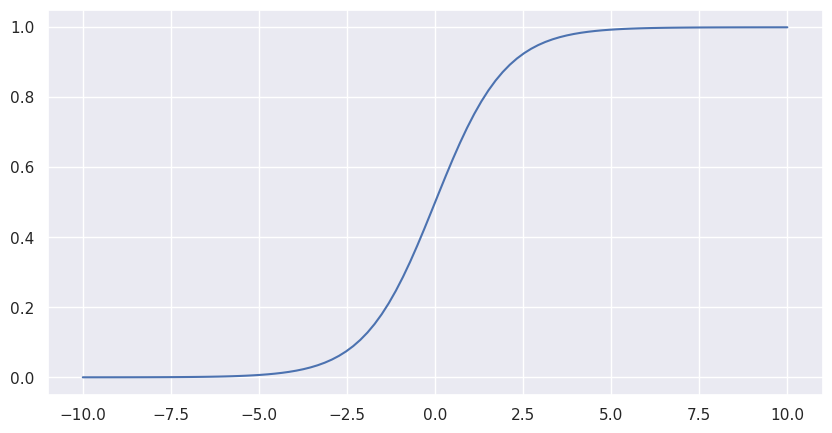

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(10, 5))
x = np.linspace(-10, 10, 100)
sns.lineplot(x=x, y=sigmoid(x));

Wzór $(\text{logit model})$ można przekształcić do postaci:



<div class="wzor">

\begin{equation*}
\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)} = \exp(\beta_0+\beta_1x).\tag{odds}
\end{equation*}
</div>

Wyrażenie po lewej stronie powyższego równania nazywamy *szansą* (*odds*). Szansa jest stosunkiem prawdopodobieństwa sukcesu do prawdopodobieństwa porażki. Wartość szansy jest zawsze nieujemna, a jej zakres wartości to $[0,\infty)$. Przykładowo, prawdopoobieństwo wyrzucenia orła podczas rzutu monetą wynosi $1/2$, zatem szansa wyrzucenia orła wynosi $1/2/(1-1/2)=1:1=1$. Szansa wyrzucenia szóstki podczas rzutu kostką wynosi $1/6/(1-1/6)=1:5$.

Zobaczmy jaka jest szansa zalegania z płatnościami dla klienta o saldzie `balance`$=1800$:

In [8]:
[p] = result.predict([1, 1800])
p, p / (1 - p)

(np.float64(0.3201069956070024), np.float64(0.4708196635922016))

Widzimy, że $P(\verb+default+ = \verb+Yes+ | \verb+balance+ = 1800) = .32$. Zatem szansa na zaleganie z płatnościami wynosi $0.32/(1-0.32)\approx 0.5=1:2$, czyli jeden na trzech klientów.

Logarytmując obie strony równania $(\text{odds})$ otrzymujemy:

<div class="wzor">

\begin{equation*}
\log\left(\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)}\right) = \beta_0+\beta_1x.\tag{logit}
\end{equation*}
</div>

Lewą stronę równania $(\text{logit})$ nazywamy *logarytmem szansy* (*log odds*) albo *logitem*. Zauważmy, że logit zależy w sposób liniowy od zmiennej objaśniającej $X$. Zwiększenie $x$ o jeden powoduje dodanie $\beta_1$ do logitu. Zatem $\beta_1$ jest współczynnikiem przyrostu logitu. Szansa w tym przypadku ulega **wymnożeniu** przez $\exp(\beta_1)$.

### Estymacja parametrów

Zwykle w modelu regresji logistycznej parametry $\beta_0$ i $\beta_1$ szacuje się metodą największej wiarygodności. W tym przypadku metoda ta przyjmuje następującą postać. Ustalmy parę $(\beta_0,\beta_1)\in\mathbb{R}^2$ i rozważmy prawdopobieństwo warunkowe

\begin{equation*}
P(Y_1=y_1,\dots,Y_n=y_n|X_1=x_1,\dots,X_n=x_n;\beta_0,\beta_1).
\end{equation*}

Poszukujemy takich parametrów $\hat\beta_0$, $\hat\beta_1$, dla których prawdopodobieństwo to jest maksymalne. Będą to parametry, dla których obserwowane dane są w tym modelu najbardziej prawdopodobne. Funkcję

<div class="wzor">

\begin{equation*}
\ell(\beta_0,\beta_1) = P(Y_1=y_1,\dots,Y_n=y_n|X_1=x_1,\dots,X_n=x_n;\beta_0,\beta_1)
\end{equation*}
</div>

nazywamy *funkcją wiarygodności* (*likelihood function*). Jeśli obserwacje są niezależne, to podany wyżej warunkowy rozkład łączny można zapisać jako iloczyn rozkładów warunkowych:

<div class="wzor">

\begin{equation*}
\begin{split}
\ell(\beta_0,\beta_1) &= P(Y_1=y_1,\dots,Y_n=y_n|X_1=x_1,\dots,X_n=x_n;\beta_0,\beta_1)\\
&= \prod_{i=1}^n P(Y_i=y_i|X_i=x_i;\beta_0,\beta_1)\\
&= \prod_{i:y_i=1} P(Y_i=1|X_i=x_i;\beta_0,\beta_1)\prod_{i:y_i=0} P(Y_i=0|X_i=x_i;\beta_0,\beta_1)\\
&= \prod_{i:y_i=1} \sigma(\beta_0+\beta_1x_i)\prod_{i:y_i=0} (1-\sigma(\beta_0+\beta_1x_i)).
\end{split}
\end{equation*}

</div>

Jeśli dane $x_i$ nie są liniowo separowalne (w przypadku jednowymiarowym oznacza to brak liczby rozdzielającej wartości z obu klas), to funkcja $\ell(\beta_0,\beta_1)$ posiada dokładnie jedno maksimum lokalne $(\hat\beta_0,\hat\beta_1)$, które jest równocześnie maksimum globalnym. Wówczas $(\hat\beta_0,\hat\beta_1)$ są szukanymi estymatorami parametrów $\beta_0$, $\beta_1$. Maksimum to wyznacza się numerycznie metodą Newtona-Raphsona lub metodą gradientu prostego.

Wiele aspektów modelu logistycznego jest analogicznych do modelu liniowego. Oto tabela parametrów dla prawdobodobieństwa `default`$=1$ (czyli `Yes`) pod warunkiem `balance`:

In [9]:
result.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.6513,0.361,-29.491,0.000,-11.359,-9.943
balance,0.0055,0.000,24.952,0.000,0.005,0.006


W kolumnie `z` widzimy wartości statystyki $Z$. Dla współczynnika $\beta_1$ jest ona równa $\hat{\beta}_1/SE(\hat{\beta}_1)$, gdzie $SE(\hat{\beta}_1)$ jest estymatorem odchylenia standardowego $\hat{\beta}_1$. Statystyka $Z$ jest testowana przeciw hipotezie zerowej $H_0:\beta_1=0$. Mała wartość $p$-value pozwala na odrzucenie hipotezy zerowej na rzecz alternatywnej $H_1:\beta_1\neq 0$. Hipoteza alternatywna mówi, że etykieta $Y$ zależy od zmiennej $X$. W naszym przypadku $p$-value jest bardzo małe, co pozwala na odrzucenie hipotezy zerowej. Zatem zmienna `default` zależy od zmiennej `balance`.

Jak zinterpretować współczynnik `balance`? Zgodnie z modelem logistycznym, wzrost `balance` o jednostkę powoduje wzrost logitu o $\hat{\beta}_1=0.0055$. Zatem szansa zalegania z płatnościami ulega **wymnożeniu** przez $\exp(0.0055)\approx 1.0055$. Zatem wzrost `balance` o jednostkę powoduje wzrost szansy wystąpienia `default` o $0.55\%$.

### Predykcje

Z podanej wyżej tabeli wnioskujemy, że

\begin{equation*}
\begin{split}
\hat{P}(\texttt{default} = \texttt{Yes} | \texttt{balance}) &= \sigma(-10.6513+0.0055\cdot\texttt{balance})\\
&= \frac{1}{1+\exp(-(-10.6513+0.0055\cdot\texttt{balance}))}.
\end{split}
\end{equation*}

Zatem dla `balance`$=1000$:

\begin{equation*}
\hat{P}(\texttt{default} = \texttt{Yes} | \texttt{balance} = 1000) = \frac{1}{1+\exp(-(-10.6513+0.0055\cdot 1000))} = 0.0058.
\end{equation*}

Zatem szansa zalegania z płatnościami dla klienta o saldzie `balance`$=1000$ wynosi $0.58\%$, czyli jest bardzo mała. Dla `balance`$=2000$ to prawdopodobieństwo jest znanacznie większe:

\begin{equation*}
\hat{P}(\texttt{default} = \texttt{Yes} | \texttt{balance} = 2000) = \frac{1}{1+\exp(-(-10.6513+0.0055\cdot 2000))} = 0.586,
\end{equation*}

czyli około $59\%$.

Te same predykcje można uzyskać za pomocą metody `predict`:

In [10]:
result.predict([1, 1000])

array([0.00575215])

In [11]:
result.predict([1, 2000])

array([0.58576937])

Podobnie jak w przypadku regresji liniowej, również i w regresji logistycznej predyktor może być zmienną jakościową. 

Przykład modelu szacującego prawdobodobieństwo wystąpienia `default` pod warunkiem `student`:

In [12]:
y = df.default.map({'Yes': 1, 'No': 0})
X = df.student.map({'Yes': 1, 'No': 0})
logit = sm.Logit(y, sm.add_constant(X))
result = logit.fit()
result.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.5041,0.071,-49.554,0.000,-3.643,-3.366
student,0.4049,0.115,3.520,0.000,0.179,0.630


$p$-wartość dla współczynnika `student` jest bardzo mała, co pozwala na odrzucenie hipotezy zerowej $H_0:\beta_1=0$ na rzecz hipotezy alternatywnej $H_1:\beta_1\neq 0$. Zatem zmienna `default` zależy od zmiennej `student`. Współczynnik $\beta_1$ jest dodatni, co oznacza, że szansa zalegania z płatnościami jest większa dla studentów niż dla nie-studentów. Konkretne prawdopobieństwa są następujące:

\begin{equation*}
\begin{split}
\hat{P}(\texttt{default} = \texttt{Yes} | \texttt{student} = \texttt{Yes}) &= \sigma(-3.5041+0.4049\cdot 1)\\
&= \frac{1}{1+\exp(-(-3.5041+0.4049))} = 0.0431,
\end{split}
\end{equation*}

oraz 

\begin{equation*}
\begin{split}
\hat{P}(\texttt{default} = \texttt{Yes} | \texttt{student} = \texttt{No}) &= \sigma(-3.5041+0.4049\cdot 0)\\
&= \frac{1}{1+\exp(-(-3.5041))} = 0.0292.
\end{split}
\end{equation*}

In [13]:
result.predict([1, 1])

array([0.04313859])

In [14]:
result.predict([1, 0])

array([0.02919501])

### Regresja logistyczna wielowymiarowa

Teraz zakładamy, że $X$ jest wektorem losowym o wartościach w $\mathbb{R}^p$. Wówczas model regresji logistycznej ma postać:



<div class="wzor">

\begin{equation*}
\begin{split}
P(Y=1|X=x) &= \frac{\exp(\beta_0+\beta_1x_1+\dots+\beta_px_p)}{1+\exp(\beta_0+\beta_1x_1+\dots+\beta_px_p)} \\
&= \frac{1}{1+\exp(-(\beta_0+\beta_1x_1+\dots+\beta_px_p))} \\
&= \sigma(\beta_0+\beta_1x_1+\dots+\beta_px_p).
\end{split}
\end{equation*}
</div>



Wzór ten możemy przekształcić do postaci, w której po lewej stronie znajduje się szansa:

<div class="wzor">

\begin{equation*}
\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)} = \exp(\beta_0+\beta_1x_1+\dots+\beta_px_p).
\end{equation*}
</div>

lub logit:

<div class="wzor">

\begin{equation*}
\log\left(\frac{P(Y=1|X=x)}{1-P(Y=1|X=x)}\right) = \beta_0+\beta_1x_1+\dots+\beta_px_p.
\end{equation*}

</div>

Model logistyczny prawdobodobieństwa `default`$=1$ pod warunkiem `balance`, `income` i `student`:

In [15]:
y = df.default.map({'Yes': 1, 'No': 0})
X = df[['balance', 'income']].copy()
X['student'] = df.student.map({'Yes': 1, 'No': 0})
logit = sm.Logit(y, sm.add_constant(X))
result = logit.fit()
result.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
const,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05
student,-0.6468,0.236,-2.738,0.006,-1.110,-0.184


Zauważmy, że teraz, przeciwnie niż w poprzednim modelu, współczynnik `student` jest ujemny. Czyli poprzednio uzyskaliśmy wniosek, że wśród studentów szansa na zaleganie z płatnościami jest większa niż wśród nie-studentów, podczas gdy teraz uzyskujemy wniosek odwrotny. Fakt ten jest spowodowany tym, że zmienna `balance` częściowo tłumaczy tak zmienną `student`, jak i `default`: wzrost `balance` powoduje wzrost prawdopodobieństwa na zaleganie z płatnościami i jednocześnie wzrost prawdopodobieństwa bycia studentem. Zmienna `balance` jest *zmienną zakłócającą* (*confounding variable*) wprowadzającą pozorną zależność między `student` a `default`. Zależność ta udaje się wyjaśnić dopiero po wprowadzeniu zmiennej `balance` do modelu.

Obliczmy prawdobodobieństwa wystąpienia `default` dla klienta o saldzie `balance`$=2000$, dochodzie `income`$=50000$ i będącego studentem:

<!-- \begin{equation*}
\begin{split}
\hat{P}(\verb+default+ = \verb+Yes+ |& \verb+balance+ = 2000, \verb+income+ = 50000, \verb+student+ = \verb+Yes+)\\ &= \sigma(-10.8690+0.0057\cdot 2000+0.0000\cdot 50000-0.6468\cdot 1)\\
&= \frac{1}{1+\exp(-(-10.8690+0.0057\cdot 2000+0.0000\cdot 50000-0.6468\cdot 1))} = 0.53.
\end{split}
\end{equation*} -->

\begin{equation*}
\begin{split}
\hat{P}(\texttt{default} = \texttt{Yes} |& \texttt{balance} = 2000, \texttt{income} = 50000, \texttt{student} = \texttt{Yes})\\ &= \sigma(-10.8690+0.0057\cdot 2000+0.0000\cdot 50000-0.6468\cdot 1)\\
&= \frac{1}{1+\exp(-(-10.8690+0.0057\cdot 2000+0.0000\cdot 50000-0.6468\cdot 1))} = 0.53.
\end{split}
\end{equation*}

In [16]:
result.predict([1, 2000, 50000, 1])

array([0.52718866])

### Wieloklasowa regresja logistyczna

Model regresji logistycznej można rozszerzyć na przypadek zmiennej celu $Y$ przyjmującej więcej niż dwie wartości. Wówczas prawdopodobieństwo $P(Y=k|X=x)$, że $Y$ przyjmuje wartość $k$ pod warunkiem $X=x$, wyraża się wzorem:

<div class="wzor">

\begin{equation*}
P(Y=k|X=x) = \frac{\exp(\beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kp}x_p)}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_{l1}x_1+\dots+\beta_{lp}x_p)},
\end{equation*}
</div>



dla $k=1,\dots,K-1$, gdzie $K$ jest liczbą klas. Ponieważ prawdopodoobieństwa sumują się do $1$, więc

<div class="wzor">

\begin{equation*}
P(Y=K|X=x) = \frac{1}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_{l1}x_1+\dots+\beta_{lp}x_p)}.
\end{equation*}
</div>

Klasa $K$ została wybrana jako klasą referencyjna. Wersja logitowa tego modelu ma postać:

<div class="wzor">

\begin{equation*}
\log\left(\frac{P(Y=k|X=x)}{P(Y=K|X=x)}\right) = \beta_{k0}+\beta_{k1}x_1+\dots+\beta_{kp}x_p,
\end{equation*}
</div>

dla $k=1,\dots,K-1$. 

Różne wybory klasy referencyjnej prowadzą do różnych, ale równoważnych modeli. Interpretacja modelu zależy od wyboru klasy referencyjnej.